In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def Visual(X,Y,Z):
#     X = X_train['X'].tolist() + X_test['X'].tolist()
#     Y = X_train['Y'].tolist() + X_test['Y'].tolist()
#     Z = df_train['NTG'].tolist() + y_pred.tolist()
    # print(X)
    # print(Y)
    # print(Z)
    
    ####визуализация прогноза
    
    fig = plt.figure()
    ax = Axes3D(fig)
    surf = ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    
    C = plt.tricontour(X, Y, Z, colors='black', linewidths=1)
    plt.tricontourf(X, Y, Z)
    plt.clabel(C, inline=1, fontsize=10)
    plt.show()
    
    plt.style.use('fivethirtyeight')
    Z=df_train['NTG']
    #z=sorted(z)

    plt.hist(Z, bins = 100, edgecolor = 'k');
    plt.xlabel('NTG'); plt.ylabel('Кол-во повторений');
    plt.title('Гистограмма частотного анализа');

In [3]:
df_test = pd.read_csv('Empty_part.csv')
df_train = pd.read_csv('Training_wells.csv')

In [4]:
df_test = df_test.drop(['Well'], axis=1)
df_train = df_train.drop(['Well'], axis=1)

In [5]:
print(df_train)
print(df_test)

       X    Y     NTG
0    201  907  0.2006
1    201  914  0.3624
2    201  924  0.4381
3    202  922  0.4289
4    202  925  0.4021
..   ...  ...     ...
133  245  908  0.2719
134  245  911  0.3780
135  245  923  0.4239
136  246  905  0.4900
137  246  923  0.3667

[138 rows x 3 columns]
        X    Y
0     201  901
1     201  902
2     201  903
3     201  904
4     201  905
...   ...  ...
1237  246  926
1238  246  927
1239  246  928
1240  246  929
1241  246  930

[1242 rows x 2 columns]


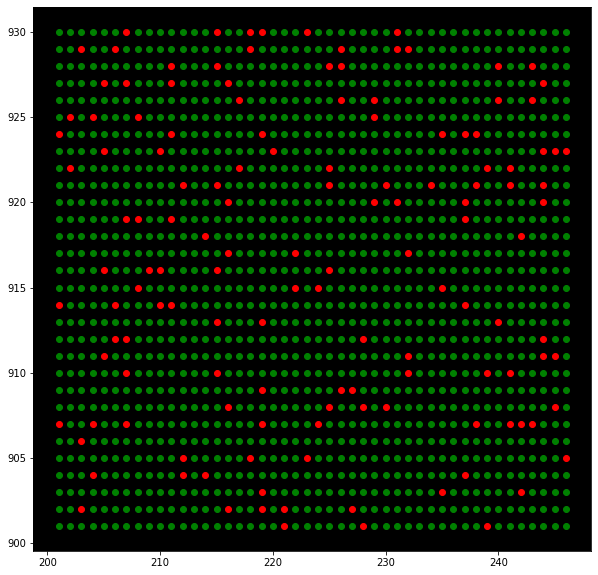

In [6]:
df = df_train
x = df['X']
y = df['Y']

fig, ax = plt.subplots()

ax.scatter(x, y,c = 'red')    #  цвет точек

df = df_test
x = df['X']
y = df['Y']

ax.scatter(x, y, c = 'green')    #  цвет точек
ax.set_facecolor('black')

fig.set_figwidth(10)     #  ширина и
fig.set_figheight(10)    #  высота "Figure"

plt.show()

0      0.2006
1      0.3624
2      0.4381
3      0.4289
4      0.4021
        ...  
133    0.2719
134    0.3780
135    0.4239
136    0.4900
137    0.3667
Name: NTG, Length: 138, dtype: float64


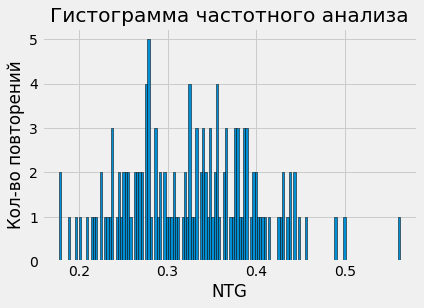

In [7]:
plt.style.use('fivethirtyeight')
z=df_train['NTG']
#z=sorted(z)
print(z)
plt.hist(z, bins = 150, edgecolor = 'k');
plt.xlabel('NTG'); plt.ylabel('Кол-во повторений');
plt.title('Гистограмма частотного анализа');

##TODO почистить значения, сто проц убрать пик 235	903	0,5625


In [8]:
df = pd.concat([df_train, df_test])#объединяем фреймы
df['NTG'].fillna(0.0, inplace=True)#зануляем пропуски для построение поверхности
print(df)


        X    Y     NTG
0     201  907  0.2006
1     201  914  0.3624
2     201  924  0.4381
3     202  922  0.4289
4     202  925  0.4021
...   ...  ...     ...
1237  246  926  0.0000
1238  246  927  0.0000
1239  246  928  0.0000
1240  246  929  0.0000
1241  246  930  0.0000

[1380 rows x 3 columns]


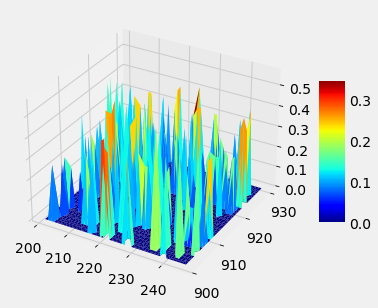

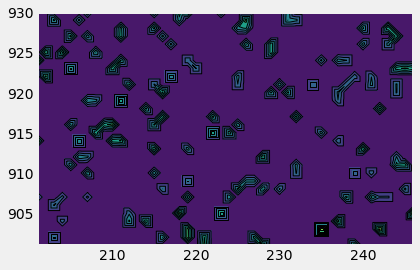

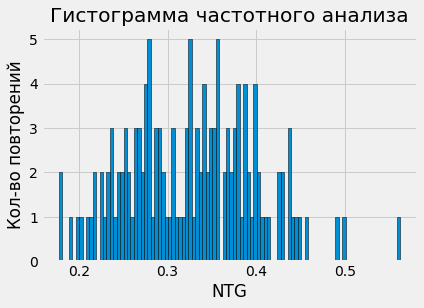

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
X = df['X']
Y = df['Y']
Z = df['NTG']

# fig = plt.figure()
# ax = Axes3D(fig)
# surf = ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
# fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.show()
Visual(X,Y,Z)

In [10]:
# преобразования перед прогнозом
X_train= df_train[['X','Y']]
y_train= df_train['NTG']
X_test= df_test[['X','Y']]

print(X_train)
print(y_train)
print(X_test)

       X    Y
0    201  907
1    201  914
2    201  924
3    202  922
4    202  925
..   ...  ...
133  245  908
134  245  911
135  245  923
136  246  905
137  246  923

[138 rows x 2 columns]
0      0.2006
1      0.3624
2      0.4381
3      0.4289
4      0.4021
        ...  
133    0.2719
134    0.3780
135    0.4239
136    0.4900
137    0.3667
Name: NTG, Length: 138, dtype: float64
        X    Y
0     201  901
1     201  902
2     201  903
3     201  904
4     201  905
...   ...  ...
1237  246  926
1238  246  927
1239  246  928
1240  246  929
1241  246  930

[1242 rows x 2 columns]


In [11]:

# C=plt.tricontour(X,Y,Z,colors='black',linewidths=1)
# plt.tricontourf(X,Y,Z)
# plt.clabel(C, inline=1, fontsize=10)
# plt.show()


[0.34402705 0.34329351 0.34255998 ... 0.31034995 0.30961642 0.30888288]


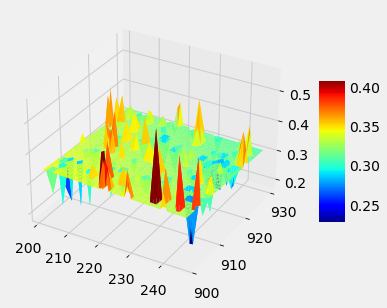

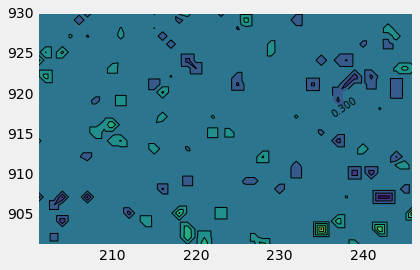

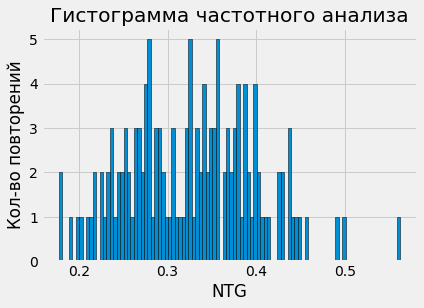

In [12]:
# линейная регрессия
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)

print(y_pred)
###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)

[0.236  0.236  0.236  ... 0.3908 0.3908 0.3908]


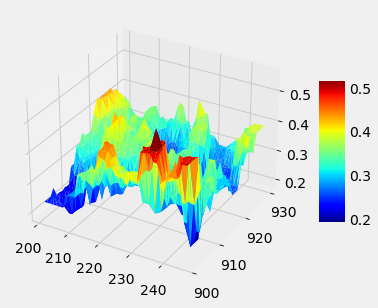

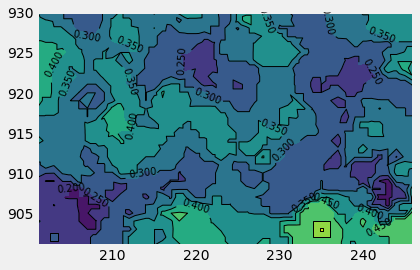

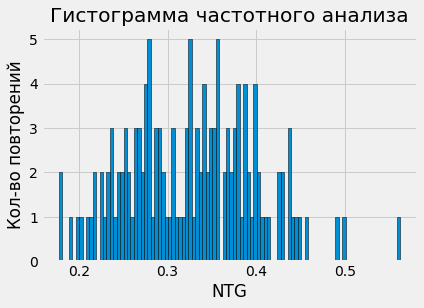

In [13]:
# кнн регрессия
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
KNeighborsRegressor(...)
y_pred=neigh.predict(X_test)
print(y_pred)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)

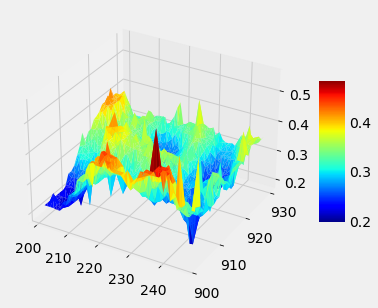

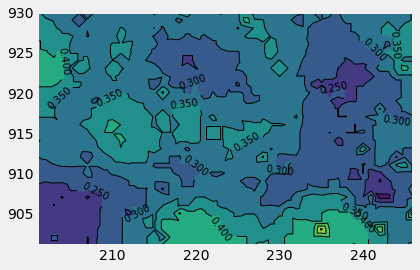

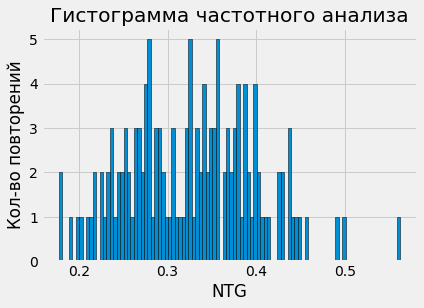

In [14]:
# кнн регрессия 5 соседей
from sklearn import neighbors
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_pred = knn.fit(X_train, y_train).predict(X_test)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)

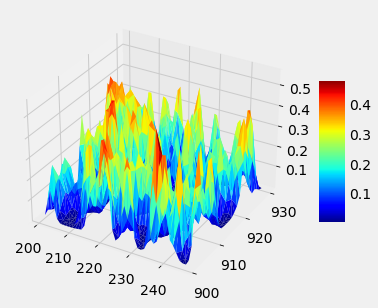

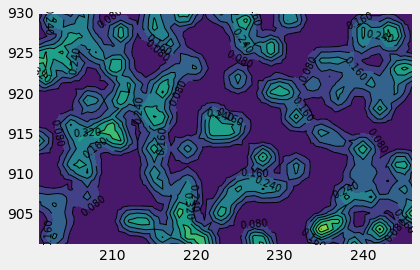

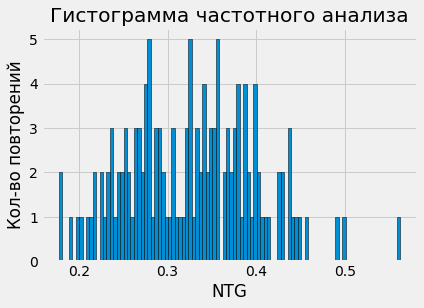

In [15]:
# гауспроцесс регрессия 
from sklearn import gaussian_process

model= gaussian_process.GaussianProcessRegressor()
y_pred = model.fit(X_train, y_train).predict(X_test)

###преобразование для визуализации
X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)

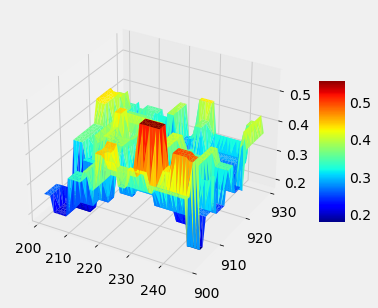

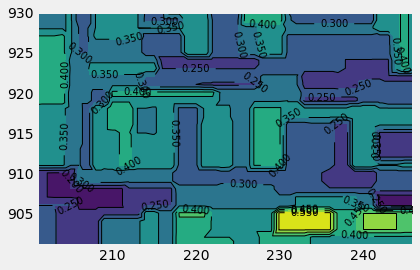

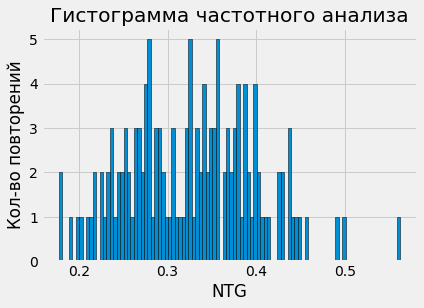

In [16]:
# древесная регерессия 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

Visual(X,Y,Z)

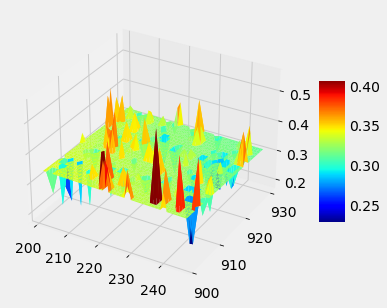

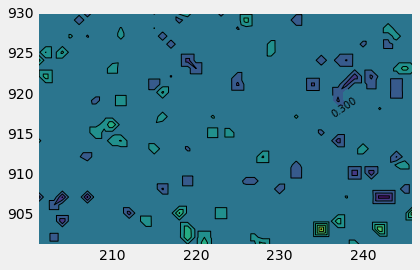

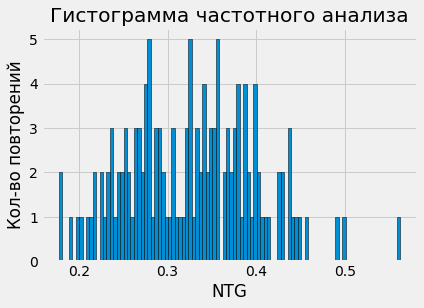

In [17]:
## кольцо баес лол)
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred= reg.predict (X_test)



###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()

####визуализация прогноза
Visual(X,Y,Z)

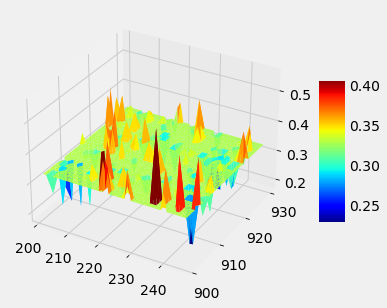

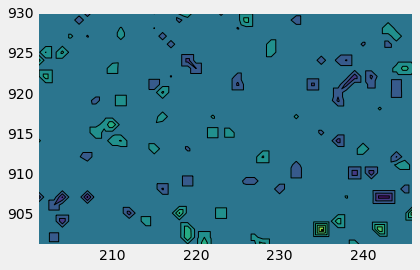

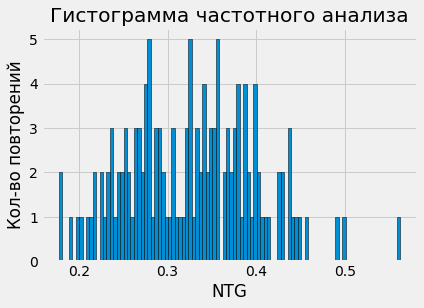

In [18]:
# метод опорных векторв
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train, y_train) 
y_pred =clf.predict(X_test)

###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()


####визуализация прогноза

Visual(X,Y,Z)

[-37.41379711 -37.44106634 -37.46833556 ... -40.94616589 -40.9771906
 -41.00821532]


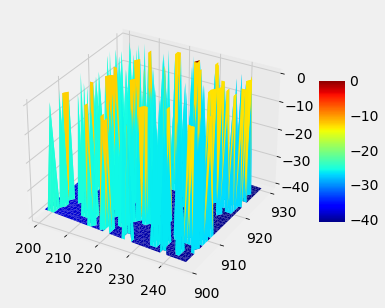

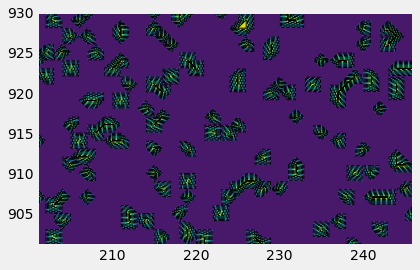

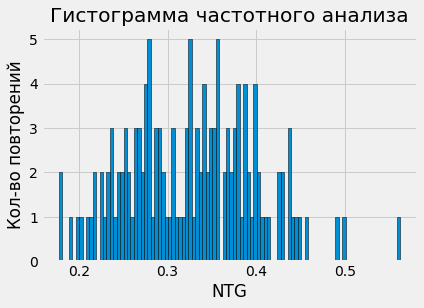

In [19]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor().fit(X_train, y_train)
y_pred=regr.predict(X_test)

print(y_pred)
###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()


####визуализация прогноза

Visual(X,Y,Z)

[9.44027218e+14 9.44837329e+14 9.45647440e+14 ... 1.01383689e+15
 1.01464700e+15 1.01545711e+15]


OverflowError: Python int too large to convert to C long

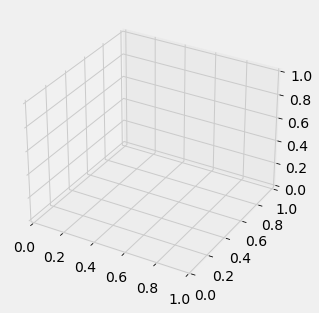

In [20]:
# градиентный спуск
from sklearn import linear_model
clf = linear_model.SGDRegressor()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

print(y_pred)
###преобразование для визуализации

X=X_train['X'].tolist() + X_test['X'].tolist()
Y=X_train['Y'].tolist() + X_test['Y'].tolist()
Z=df_train['NTG'].tolist() + y_pred.tolist()


####визуализация прогноза

Visual(X,Y,Z)